# Increasing Operational Efficiency and Profits Through Coffee Shop Sales Analysis Using Pandas

## About Dataset

The dataset covers sales activities within a local coffee shop, encompassing a range of information such as transaction records and product details. By analyzing this data using SQL queries and data analysis techniques, we aim to uncover valuable insights that can inform decision-making and drive business growth.

### 1. Overview of the Dataset

The dataset is divided into three tables, with each column labeled according to its function. The following sections provide an overview of each table's structure as well as an entity-relationship diagram of the three tables. To enhance visualization, we using Python's Pandas package.

In [1]:
# Load dataset
import pandas as pd
df = pd.read_csv('Project.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Project.csv'

##### Summary Dataset
Target : Identify product that possibly have lot impact to profit <br>
Column : product

## Stage 1

### Exploratory Data Analysist

Exploratory Data Analysis (EDA) is a technique used to understand the structure, characteristics, and patterns in data before proceeding with further analysis or building predictive models. EDA helps identify anomalies, check assumptions, discover relationships between variables, and inform subsequent analysis steps.

#### 1. Descriptive Statistics

Mean, Median, Mode : Measure the central tendency of the data. <br>
Range, Variance, Standard Deviation : Measure the dispersion or variation in the data.

In [ ]:
# Check dataset features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [ ]:
# Function to check mean values
def mean(x):
    return '{:,.3f}'.format(x.mean())

# Funtion to check median values
def median(x):
    return '{:,.3f}'.format(x.median())

# Function to check mode values
def mode(x):
    return '{:,.3f}'.format(x.mode().iloc[0])

# Function to check interquartile
def interquartile(x):
    result = x.quantile(0.75) - x.quantile(0.25)
    return result

# Function to check standard deviation
def standard_dev(x):
    return '{:,.0f}'.format(x.std()) 

# Function to check max outliers
def outliers_max(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.25)-outliers
    return result

# Function to check min outliers
def outliers_min(x):
    outliers = 1.5 * interquartile(x)
    result = x.quantile(0.75)-outliers
    return result

In [ ]:
df.select_dtypes(include='int').agg(['median', mode, interquartile, standard_dev, outliers_max, outliers_min]).reset_index()

,index,transaction_id,store_id,product_id,transaction_qty,Hour,Month,Day of Week
0,median,74727.5,5.0,47.0,1.0,11.0,4.0,3.0
1,mode,1.000,8.000,71.000,1.000,10.000,6.000,4.000
2,interquartile,74758.5,5.0,27.0,1.0,6.0,2.0,4.0
3,standard_dev,"43,154",2,18,1,4,2,2
4,outliers_max,-74802.0,-4.5,-7.5,-0.5,0.0,0.0,-5.0
5,outliers_min,-43.5,0.5,19.5,0.5,6.0,2.0,-1.0


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,"149,116.000","149,116.000","149,116.000","149,116.000","149,116.000","149,116.000","149,116.000","149,116.000","149,116.000"
mean,"74,737.372",5.342,47.919,1.438,3.382,4.686,11.736,3.989,2.982
std,"43,153.600",2.074,17.930,0.543,2.659,4.227,3.765,1.673,1.997
min,1.000,3.000,1.000,1.000,0.800,0.800,6.000,1.000,0.000
25%,"37,335.750",3.000,33.000,1.000,2.500,3.000,9.000,3.000,1.000
50%,"74,727.500",5.000,47.000,1.000,3.000,3.750,11.000,4.000,3.000
75%,"112,094.250",8.000,60.000,2.000,3.750,6.000,15.000,5.000,5.000
max,"149,456.000",8.000,87.000,8.000,45.000,360.000,20.000,6.000,6.000


##### Summary Descriptive Analyst
Numerical column that include transaction_id, store_id, product_id, transaction_qty, unit_price, Total_Bill have bigger mean value than the median value. That visualize that column have outliers, but in the standard deviation that visualize how bigger one values to others. It's indicate not that bigger and probably can ignore the outliers for next calculation

#### 2. Univriate Analysist
Univariate analysis involves the examination of a single variable. It focuses on describing the distribution, central tendency, and dispersion of that variable.

array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'product_id'}>],
       [<Axes: title={'center': 'transaction_qty'}>,
        <Axes: title={'center': 'unit_price'}>,
        <Axes: title={'center': 'Total_Bill'}>],
       [<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day of Week'}>]], dtype=object)

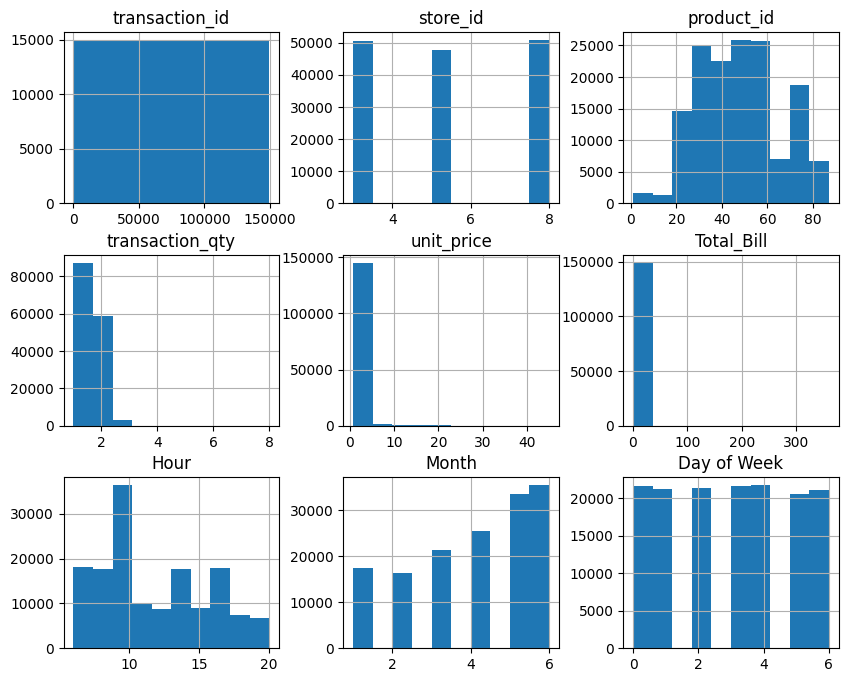

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))

##### Summary Univariate Analyst
From the distibution plot, it's absolutly like a normal skewed for all of the numerical column and probably can continue to next calculation

#### 3. Multivariate Analysist
Multivariate analysis involves the examination of more than one variable at the same time. It explores relationships and interactions between multiple variables.

In [ ]:
import datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
df['Year'] = df['transaction_date'].dt.year
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10004\3569536794.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_time'] = pd.to_datetime(df['transaction_time'])


,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,Year
0,114301,2023-06-01,2024-07-13 11:33:29,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3,2023
1,115405,2023-06-02,2024-07-13 11:18:24,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4,2023
2,115478,2023-06-02,2024-07-13 12:02:45,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4,2023
3,116288,2023-06-02,2024-07-13 19:39:47,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4,2023
4,116714,2023-06-03,2024-07-13 12:24:57,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5,2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   Total_Bill        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
 12  Size              149116 non-null  object        
 13  Month Name        149116 non-null  object        
 14  Day 

In [ ]:
def plot_bar(df,x):
    counts = df[x].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color='skyblue')
    plt.xlabel(x)
    plt.ylabel('Counts')
    plt.title(f'Bar Chart of {x}')
    plt.xticks(rotation=45)
    plt.show()

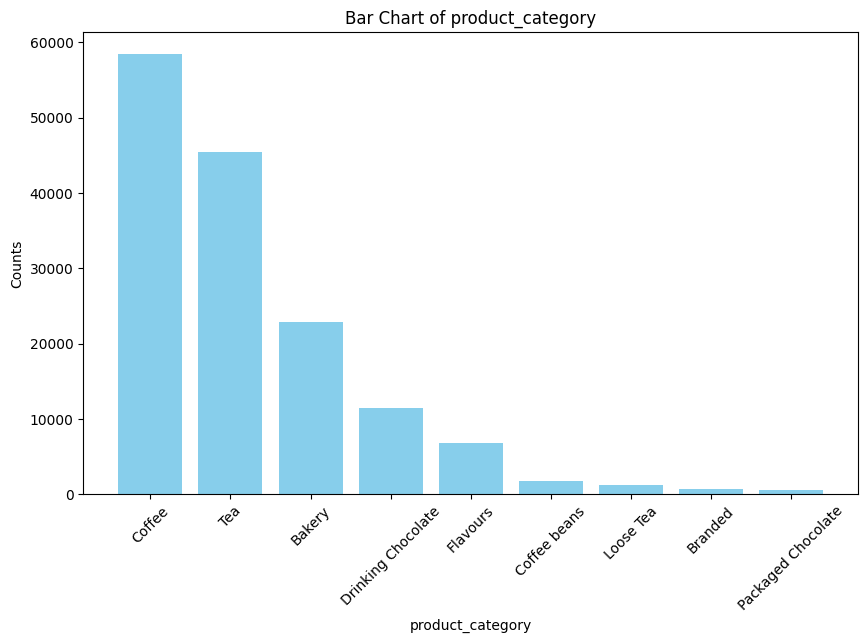

In [ ]:
plot_bar(df,'product_category')

##### Summary Multivariate Analyst
Berdasarkan plot yang telah dibuat, kategori product yang paling banyak dipesan adalah minimuman dengan jenis coffee

## Stage 2
Pada stage ini akan lebih banyak terkait proses visualisasi pada setiap features yang ada dan melihat korelasinya terhadap target

### Data Cleaning

In [ ]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
Year                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   Total_Bill        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
 12  Size              149116 non-null  object        
 13  Month Name        149116 non-null  object        
 14  Day 

In [ ]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,Year
0,114301,2023-06-01,2024-07-13 11:33:29,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3,2023
1,115405,2023-06-02,2024-07-13 11:18:24,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4,2023
2,115478,2023-06-02,2024-07-13 12:02:45,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4,2023
3,116288,2023-06-02,2024-07-13 19:39:47,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4,2023
4,116714,2023-06-03,2024-07-13 12:24:57,3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5,2023


## Trends and Patterns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_mod = df.drop(['transaction_id', 'transaction_date', 'store_id'], axis=1)

In [ ]:
df_mod['transaction_time'] = pd.to_datetime(df_mod['transaction_time'])
df_mod['hour'] = df_mod['transaction_time'].dt.hour
df_mod = df_mod.drop(['transaction_time'], axis=1)

In [ ]:
df_mod.head()

,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,Year,hour
0,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3,2023,11
1,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4,2023,11
2,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4,2023,12
3,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4,2023,19
4,Astoria,45,1,3.000,3.000,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5,2023,12


### Segmentation by store_location

In [ ]:
segment_store = df_mod.groupby([
    'store_location', 
    'product_category', 
    'product_type', 
    'product_detail', 
    'product_id', 
    'unit_price', 
    'transaction_qty', 
    'Total_Bill'
]).agg({
    'product_id':'count'
}).rename(columns={
    'product_id':'total_count'
}).reset_index().sort_values(by=['store_location'], ascending=True)
segment_store.head()

,store_location,product_category,product_type,product_detail,product_id,unit_price,transaction_qty,Total_Bill,total_count
0,Astoria,Bakery,Biscotti,Chocolate Chip Biscotti,76,3.500,1,3.500,586
101,Astoria,Loose Tea,Herbal tea,Peppermint,12,8.950,1,8.950,55
99,Astoria,Loose Tea,Green tea,Serenity Green Tea,15,9.250,1,9.250,42
98,Astoria,Loose Tea,Chai tea,Traditional Blend Chai,16,8.950,1,8.950,31
97,Astoria,Loose Tea,Chai tea,Spicy Eye Opener Chai,18,10.950,1,10.950,37


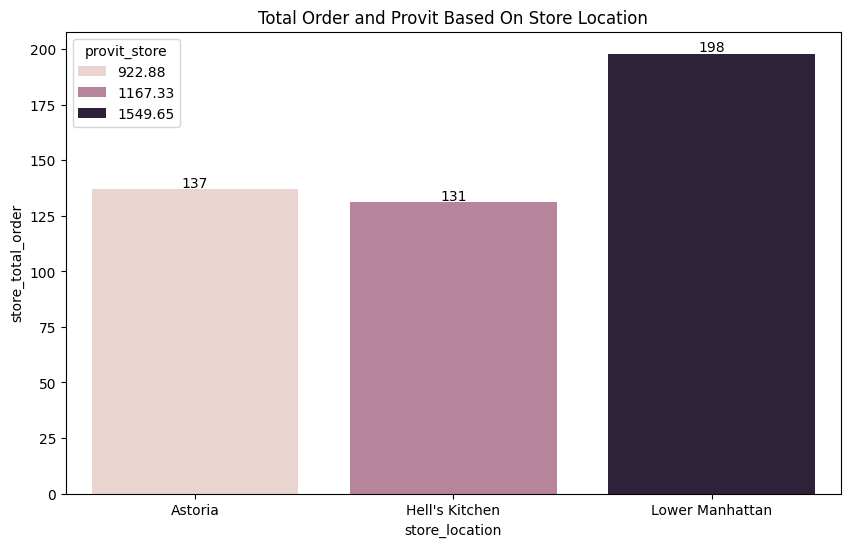

In [ ]:
#total order in location_store Astoria
segment_store1 = segment_store.groupby('store_location').agg({
    'product_category':'count',
    'Total_Bill':'sum'
}).reset_index().rename(columns={
    'product_category':'store_total_order',
    'Total_Bill':'provit_store'
})

plt.figure(figsize=(10,6))
plt.title('Total Order and Provit Based On Store Location')
bar_plot1 = sns.barplot(x='store_location', y='store_total_order', hue='provit_store', data=segment_store1)
for index, row in segment_store1.iterrows():
    bar_plot1.text(row.name, row.store_total_order + 1, row.store_total_order, color='black', ha='center')
plt.show()

##### Summary Segmentation by Store
Store dengan penjualan tertinggi adalah Lower Manhattan diikuti dengan Astoria dan Hell's Kitchen

### Segmentation by product_category

In [ ]:
product_segment = df_mod.groupby([
    'product_category',
    'product_type',
    'product_detail',
    'product_id',
    'Total_Bill'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
product_segment.head()

,product_category,product_type,product_detail,product_id,Total_Bill,total_count,total_profit
0,Bakery,Biscotti,Chocolate Chip Biscotti,76,3.500,1841,"6,443.500"
1,Bakery,Biscotti,Chocolate Chip Biscotti,76,4.380,17,74.460
2,Bakery,Biscotti,Chocolate Chip Biscotti,76,7.000,33,231.000
3,Bakery,Biscotti,Ginger Biscotti,74,3.500,1774,"6,209.000"
4,Bakery,Biscotti,Ginger Biscotti,74,4.380,12,52.560


In [ ]:
product_segment.groupby(['product_category']).agg({'total_count':'count', 'total_profit':'sum'}).reset_index().sort_values(by='total_profit', ascending=False)

,product_category,total_count,total_profit
2,Coffee,67,"269,952.450"
8,Tea,48,"196,405.950"
0,Bakery,35,"82,315.640"
4,Drinking Chocolate,12,"72,416.000"
3,Coffee beans,15,"40,085.250"
1,Branded,10,"13,607.000"
6,Loose Tea,8,"11,213.600"
5,Flavours,15,"8,408.800"
7,Packaged Chocolate,3,"4,407.640"


#### Summary Product_Category
Kategori produk sama dengan berdasarkan pada segmentation berdasarkan letak restoran yaitu coffee

### Segmentation by Size

In [ ]:
size_segment = df_mod.groupby([
    'Size',
    'product_category',
    'product_type',
    'product_detail',
    'product_id',
    'Total_Bill'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
size_segment.head()

,Size,product_category,product_type,product_detail,product_id,Total_Bill,total_count,total_profit
0,Large,Coffee,Barista Espresso,Cappuccino,41,4.250,1471,"6,251.750"
1,Large,Coffee,Barista Espresso,Cappuccino,41,8.500,1225,"10,412.500"
2,Large,Coffee,Barista Espresso,Cappuccino,41,12.750,74,943.500
3,Large,Coffee,Barista Espresso,Cappuccino,41,17.000,2,34.000
4,Large,Coffee,Drip coffee,Our Old Time Diner Blend,24,3.000,1373,"4,119.000"


In [ ]:
size_segment.groupby([
    'Size']).agg({
        'total_count':'count', 
        'total_profit':'sum'}).reset_index()

,Size,total_count,total_profit
0,Large,49,"237,958.150"
1,Not Defined,101,"214,690.130"
2,Regular,48,"199,761.350"
3,Small,15,"46,402.700"


#### Summary Segmentation by Size
Dengan minuman coffee yang paling banyak menghasilkan profit, ukuran Large adalah ukuran yang paling banyak menghasilkan profit

### Segmentation by Month Name

In [ ]:
month_segment = df_mod.groupby([
    'Month Name',
    'product_category',
    'Total_Bill'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
month_segment.head()

,Month Name,product_category,Total_Bill,total_count,total_profit
0,April,Bakery,2.650,24,63.600
1,April,Bakery,3.000,308,924.000
2,April,Bakery,3.250,996,"3,237.000"
3,April,Bakery,3.500,921,"3,223.500"
4,April,Bakery,3.750,1188,"4,455.000"


In [ ]:
month_segment.groupby([
    'Month Name']).agg({
        'total_count':'count', 
        'total_profit':'sum'}).reset_index().sort_values(by='total_profit', ascending=False)

,Month Name,total_count,total_profit
3,June,105,"166,485.880"
5,May,102,"156,727.760"
0,April,103,"118,941.080"
4,March,99,"98,834.680"
2,January,101,"81,677.740"
1,February,95,"76,145.190"


#### Summary Segmentation by Month
Bulan yang paling banyak menghasilkan profit adalah bulab juni walaupun antar bulan tidak memiliki selisih antara banyak pemesanan

### Segmentation by Day Name

In [ ]:
day_segment = df_mod.groupby([
    'Day Name'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
day_segment.sort_values(by='total_profit', ascending=False)

,Day Name,total_count,total_profit
1,Monday,21643,"101,677.280"
0,Friday,21701,"101,373.000"
4,Thursday,21654,"100,767.780"
6,Wednesday,21310,"100,313.540"
5,Tuesday,21202,"99,455.940"
3,Sunday,21096,"98,330.310"
2,Saturday,20510,"96,894.480"


#### Segmentation by Day
Hari senin merupakan hari yang paling banyak menghasilkan profit walaupun pada hari jumat merupakan hari yang paling banyak dilakukan pemesanan

### Segmentation by Year

In [ ]:
year_segment = df_mod.groupby([
    'Year'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
year_segment.sort_values(by='total_profit', ascending=False)

,Year,total_count,total_profit
0,2023,149116,"698,812.330"


#### Summary by Year
Dataset hanya memiliki record pada 2023

### Segmentation by Hour

In [ ]:
hour_segment = df_mod.groupby([
    'Hour'
]).agg({
    'product_id':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_id':'total_count', 'Total_Bill':'total_profit'})).reset_index()
hour_segment.sort_values(by='total_profit', ascending=False)

,Hour,total_count,total_profit
4,10,18545,"88,673.390"
3,9,17764,"85,169.530"
2,8,17654,"82,699.870"
1,7,13428,"63,526.470"
5,11,9766,"46,319.140"
9,15,8979,"41,733.100"
8,14,8933,"41,304.740"
10,16,9093,"41,122.750"
7,13,8714,"40,367.450"
6,12,8708,"40,192.790"


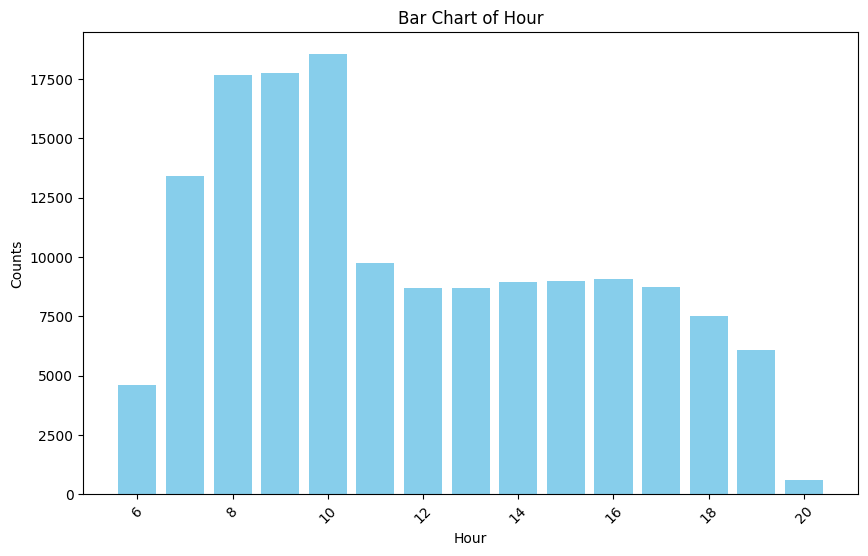

In [ ]:
plot_bar(df,'Hour')

#### Summary Segmentation by Hour
Pemesanan yang paling banyak menghasilkan profit terbanyak adalah pada rentang jam 9 hingga jam 12

### Segmentation by Transaction Date

In [ ]:
date_segment = df_mod.groupby([
    'transaction_date'
]).agg({
    'product_category':'count',
    'Total_Bill':'sum'
}).rename(columns=({'product_category':'total_count', 'Total_Bill':'total_profit'})).reset_index()
date_segment.sort_values(by='total_profit', ascending=False)

NameError: name 'df_mod' is not defined